# tf.data

In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7777)
tf.random.set_seed(7777)

# 1. 데이터 불러오기
- cifar 데이터를 load하지 않고 로컬에서 읽어오기
- `glob()` 사용

In [25]:
row_path = "E:/공부\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/"

In [26]:
os.listdir(row_path+"datasets/")

['cifar', 'mnist_png']

In [27]:
os.listdir(row_path + "datasets/cifar/train")

['0_frog.png',
 '10000_automobile.png',
 '10001_frog.png',
 '10002_frog.png',
 '10003_ship.png',
 '10004_ship.png',
 '10005_cat.png',
 '10006_deer.png',
 '10007_frog.png',
 '10008_airplane.png',
 '10009_frog.png',
 '1000_truck.png',
 '10010_airplane.png',
 '10011_cat.png',
 '10012_frog.png',
 '10013_frog.png',
 '10014_dog.png',
 '10015_deer.png',
 '10016_ship.png',
 '10017_cat.png',
 '10018_bird.png',
 '10019_frog.png',
 '1001_deer.png',
 '10020_airplane.png',
 '10021_cat.png',
 '10022_automobile.png',
 '10023_deer.png',
 '10024_airplane.png',
 '10025_frog.png',
 '10026_frog.png',
 '10027_bird.png',
 '10028_horse.png',
 '10029_frog.png',
 '1002_cat.png',
 '10030_truck.png',
 '10031_airplane.png',
 '10032_deer.png',
 '10033_dog.png',
 '10034_horse.png',
 '10035_automobile.png',
 '10036_frog.png',
 '10037_horse.png',
 '10038_truck.png',
 '10039_automobile.png',
 '1003_bird.png',
 '10040_horse.png',
 '10041_horse.png',
 '10042_ship.png',
 '10043_airplane.png',
 '10044_cat.png',
 '10045_ho

In [28]:
glob(row_path + "datasets/cifar/train/*.png")

['E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\0_frog.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10000_automobile.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10001_frog.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10002_frog.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10003_ship.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10004_ship.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10005_cat.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\10006_deer.png',
 'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11.

In [6]:
train_img = glob(row_path + "datasets/cifar/train/*.png")

# 2. TensorFlow 명령어로 Image 읽기
- `tf.io.read_file(<path>)` : 이미지 파일을 읽어옴
- `tf.io.decode_image()` : 읽어온 이미지 파일을 tensor 형식으로 decode

In [7]:
path = train_img[0]
print(path)

E:/공부\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\0_frog.png


In [8]:
raw = tf.io.read_file(path)  
img = tf.io.decode_image(raw)
print(img.shape, img.dtype)

(32, 32, 3) <dtype: 'uint8'>


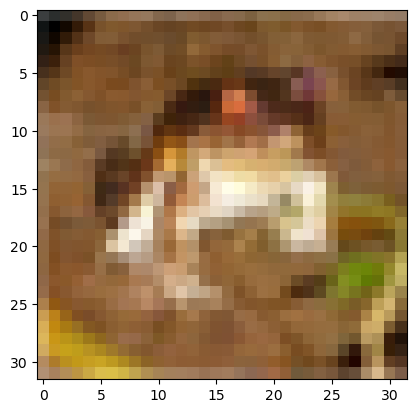

In [9]:
plt.imshow(img)
plt.show()

#### 함수로 만들기

In [10]:
def read_image(path):
    raw = tf.io.read_file(path)
    img = tf.io.decode_image(raw)
    
    return img

---
# 만약, 이미지가 수백만 장 이라면?
#### 위 방식을 사용하면 데이터 폭발이라는 대참사 발생...!!!!!

### 　
# 이미지가 많은 경우, tf.data API 사용
- 미리 이미지 데이터를 모두 불러오는 게 아니라, 그때그때 처리를 하는 것
- 속도가 빠르다

In [11]:
dataset = tf.data.Dataset.from_tensor_slices(train_img)

In [12]:
auto = tf.data.experimental.AUTOTUNE  # 내 컴퓨터에 있는 자우너을 보고 적당한 CPU 개수를 정함
dataset = dataset.map(read_image, num_parallel_calls=auto)  # num_parallel_calls 몇개의 CPU또는 GPU를 사용할 것인가

In [13]:
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140]

#### batch 처리

In [14]:
dataset = dataset.batch(32)
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,

#### prefetch
- i번째 batch를 읽는 동안, 병렬적으로 i+1 번째 batch를 읽어온다
- 1이면 충분하고, AUTOTUNE 을 사용해 알맞는 양을 알아서 정할수도 있다.
- 속도 향상에 도움을 준다

In [15]:
dataset = dataset.prefetch(auto)
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,

#### shuffle
- `buffer_size`: 섞는 회수/ 숫자가 클수록 잘 섞이지만 시간이 오래 걸린다.

In [16]:
dataset = dataset.shuffle(buffer_size=1)
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,

#### repeat
- `repeat(<epoch수>)` (빈칸인 경우 무한반복)
- 빈칸으로 두고 for문으로 자르면 되기 때문에 대부분 빈칸으로 둔다

In [17]:
dataset = dataset.repeat()
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,

## Label 까지 같이 넘기기
- 학습을 위해서는 image랑 label이 모두 필요함

In [18]:
train_img[0]

'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\0_frog.png'

- frog 가 label

In [19]:
train_img[0].split("/")[-1].split(".")[0].split("_")[-1]

'frog'

#### labels 정보가 들어있는 파일 읽어오기

In [20]:
os.listdir(row_path + "datasets/cifar")

['labels.txt', 'test_dataset.csv', 'train_dataset.csv', 'test', 'train']

In [23]:
tf.io.read_file(row_path + "datasets/cifar/labels.txt").numpy().decode("ascii").strip().split("\n")

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

#### labels 을 받으면 one-hot-encoding 된 결과를 출력하는 함수

In [29]:
label_names = tf.io.read_file(row_path + "datasets/cifar/labels.txt").numpy().decode("ascii").strip().split("\n")

np.array("frog" == np.array(label_names), dtype=np.float32)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [30]:
def parse_label(path):
    name = path.split("/")[-1].split(".")[0].split("_")[-1]
    
    return np.array(name == np.array(label_names), dtype=np.float32)

In [31]:
parse_label(train_img[0])

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### 위 함수를 사용해 train_y 생성

In [33]:
train_y = np.array([parse_label(x) for x in train_img ])
train_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### dataset 을 만드는 함수

In [35]:
def read_data(path, label):
    img = read_image(path)
    return img, label

In [37]:
dataset = tf.data.Dataset.from_tensor_slices((train_img, train_y))
dataset = dataset.map(read_data, num_parallel_calls=auto)
dataset = dataset.prefetch(1)
dataset = dataset.batch(4)
dataset = dataset.shuffle(buffer_size=1)
dataset = dataset.repeat()# 인수를 안넣으면 무한히 반복

In [38]:
next(iter(dataset))

(<tf.Tensor: shape=(4, 32, 32, 3), dtype=uint8, numpy=
 array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
  

## TensorFlow 연산을 사용해 label parsing 하기
- 위 연산은 TensorFlow를 사용한 것이 아님!

#### path에서 label 추출

In [39]:
path

'E:/공부\\제로베이스/Part 10. 텐서플로 & Part 11. 파이토치/deeplearning_frameworks_zerobaseDSS/datasets/cifar/train\\0_frog.png'

In [42]:
f_name = tf.strings.split(path, "_")[-1]
lbl_name = tf.strings.regex_replace(f_name, ".png", "")
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

#### one-hot encoding

In [44]:
tf.cast(lbl_name == label_names, tf.float32)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

#### 함수로 만들기

In [45]:
def get_label(path):
    f_name = tf.strings.split(path, "_")[-1]
    lbl_name = tf.strings.regex_replace(f_name, ".png", "")
    onehot = tf.cast(lbl_name == label_names, tf.float32)
    
    return onehot

#### 이미지 읽는 함수, 레이블 parsing 함수를 합쳐 하나의 함수로 만들기

In [46]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    label = get_label(path)
    
    return image, label

In [47]:
dataset = tf.data.Dataset.from_tensor_slices(train_img)
dataset = dataset.map(load_image_label, num_parallel_calls=auto)
dataset = dataset.prefetch(1)
dataset = dataset.batch(4)
dataset = dataset.shuffle(buffer_size=1)
dataset = dataset.repeat()

In [48]:
next(iter(dataset))

(<tf.Tensor: shape=(4, 32, 32, 3), dtype=uint8, numpy=
 array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
  

# 학습!

In [49]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2,
                 padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net1_1, net3])
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net = Add()([net, net3])
    
    net = MaxPool2D()(net)
    
    net = Flatten()(net)
    net = Dense(10, activation="softmax")(net)

    model = tf.keras.Model(inputs=inputs, outputs=net, name='resnet')
    
    return model

model = build_resnet((32, 32, 3))
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   896         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 8, 8, 32)     0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 8, 8, 64)     2112        ['max_pooling2d[0][0]']          
                                                                                             

In [50]:
learning_rate = 0.03
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [51]:
len(train_img) // 4

5995

In [53]:
# 무한히 반복하는 데이터셋의 경우는 한 epoch당 몇번의 batch를 사용할지를 정해줘야 함. 
model.fit(dataset, epochs=5, steps_per_epoch=5995)

Epoch 1/5
5995/5995 [==============================] - 223s 37ms/step - loss: 2.4730 - accuracy: 0.1006
Epoch 2/5
5995/5995 [==============================] - 50s 8ms/step - loss: 2.4833 - accuracy: 0.1020
Epoch 3/5
5995/5995 [==============================] - 50s 8ms/step - loss: 2.5619 - accuracy: 0.0985
Epoch 4/5
5995/5995 [==============================] - 51s 9ms/step - loss: 2.5768 - accuracy: 0.0995
Epoch 5/5
5995/5995 [==============================] - 51s 9ms/step - loss: 2.5711 - accuracy: 0.0988
